In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
data = heart_disease.data
metadata = heart_disease.metadata
variables = heart_disease.variables

In [53]:
print(variables.keys())
print(variables.type.tolist())

Index(['name', 'role', 'type', 'demographic', 'description', 'units',
       'missing_values'],
      dtype='object')
['Integer', 'Categorical', 'Categorical', 'Integer', 'Integer', 'Categorical', 'Categorical', 'Integer', 'Categorical', 'Integer', 'Categorical', 'Integer', 'Categorical', 'Integer']


In [31]:
print(metadata.keys())
print(metadata.name)

dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])
Heart Disease


In [42]:
print(data.keys())
print(data.original)

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal 

In [60]:
numerical_indices = variables[variables['type'] == 'Integer'].index.tolist()
categorical_indices = variables[variables['type'] == 'Categorical'].index.tolist()
column_names_int = data.original.columns[numerical_indices]
column_names_cat = data.original.columns[categorical_indices]
numerical_cols = data.original[column_names_int]
categorical_cols = data.original[column_names_cat]
print(categorical_cols)
print(numerical_cols)

     sex  cp  fbs  restecg  exang  slope  thal
0      1   1    1        2      0      3   6.0
1      1   4    0        2      1      2   3.0
2      1   4    0        2      1      2   7.0
3      1   3    0        0      0      3   3.0
4      0   2    0        2      0      1   3.0
..   ...  ..  ...      ...    ...    ...   ...
298    1   1    0        0      0      2   7.0
299    1   4    1        0      0      2   7.0
300    1   4    0        0      1      2   7.0
301    0   2    0        2      0      2   3.0
302    1   3    0        0      0      1   3.0

[303 rows x 7 columns]
     age  trestbps  chol  thalach  oldpeak   ca  num
0     63       145   233      150      2.3  0.0    0
1     67       160   286      108      1.5  3.0    2
2     67       120   229      129      2.6  2.0    1
3     37       130   250      187      3.5  0.0    0
4     41       130   204      172      1.4  0.0    0
..   ...       ...   ...      ...      ...  ...  ...
298   45       110   264      132      1.

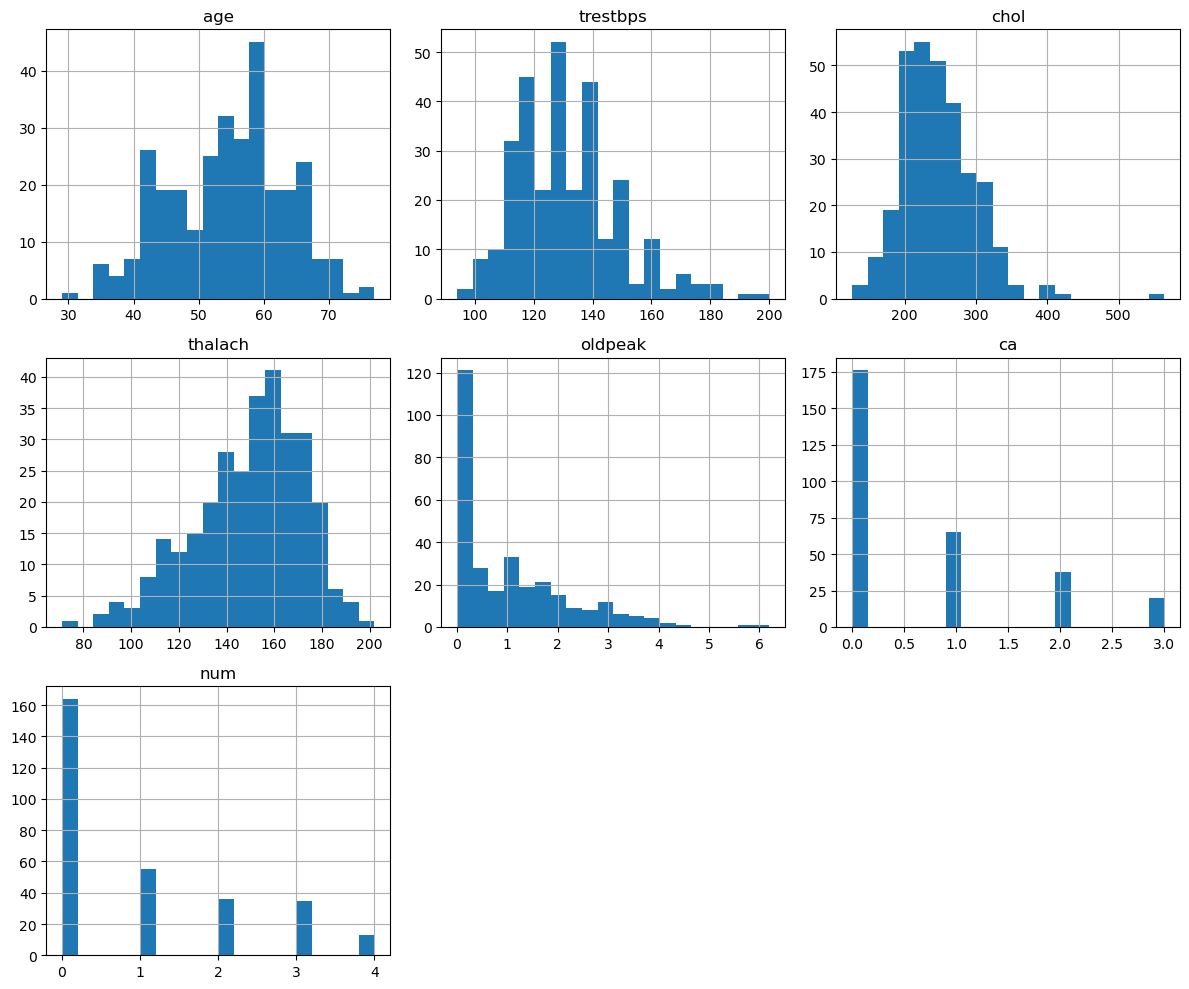

In [59]:
numerical_cols.hist(bins=20, figsize=(12, 10))
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

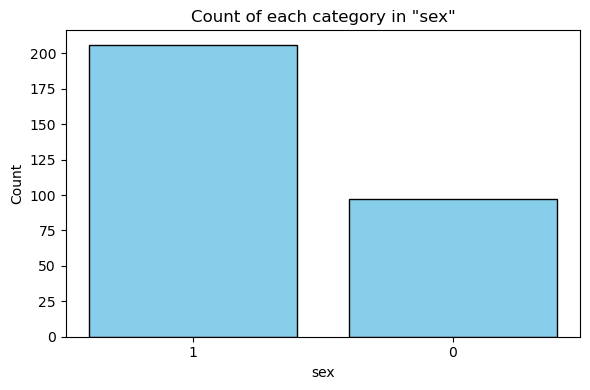

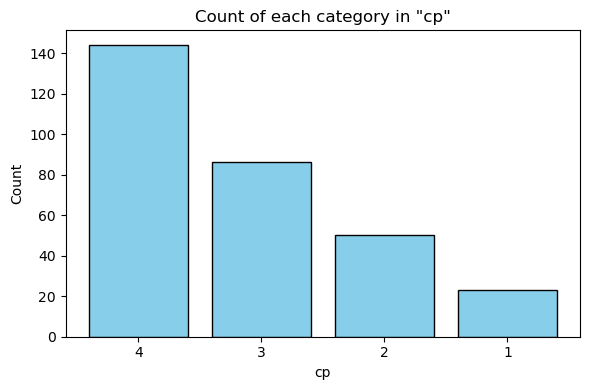

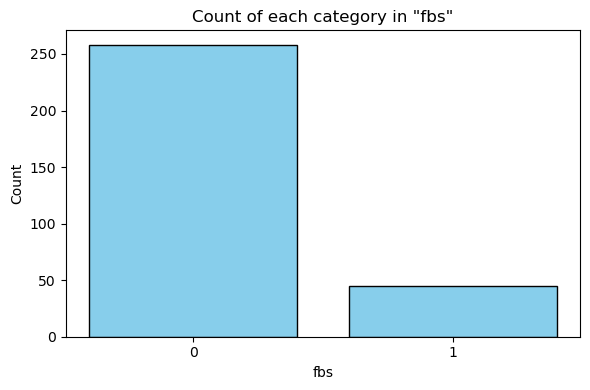

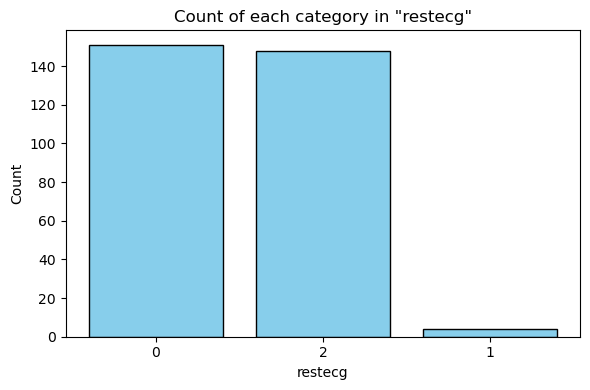

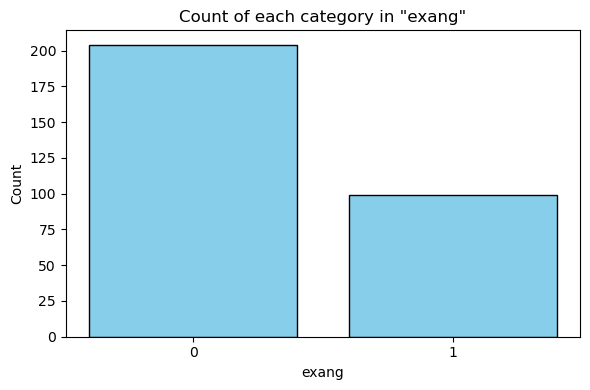

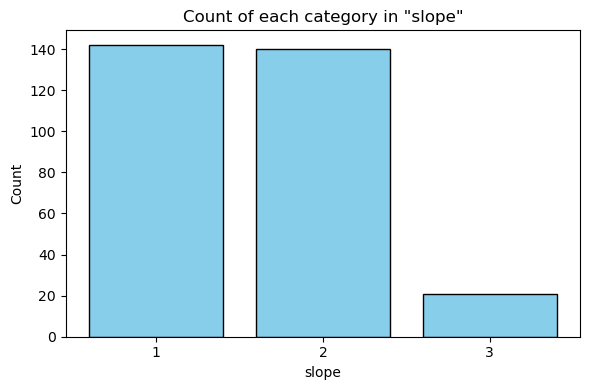

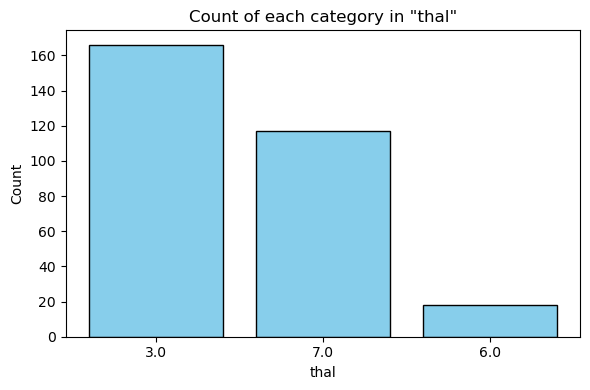

In [62]:
for col in categorical_cols.columns:
    plt.figure(figsize=(6, 4))
    categorical_counts = categorical_cols[col].value_counts()
    
    plt.bar(categorical_counts.index.astype(str), categorical_counts.values, color='skyblue', edgecolor='black')
    plt.title(f'Count of each category in "{col}"')
    plt.xlabel(col)
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()